<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Monte_Carlo_RNG_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

--- Monte Carlo Volume Estimation ---
       True Volume (Octant): 0.523599
  Good PRNG (Numpy) Volume: 0.524088  (Error: 0.000489)
   Bad PRNG (RANDU) Volume: 0.523630  (Error: 0.000031)

Generating 3D plot to show the RANDU failure...


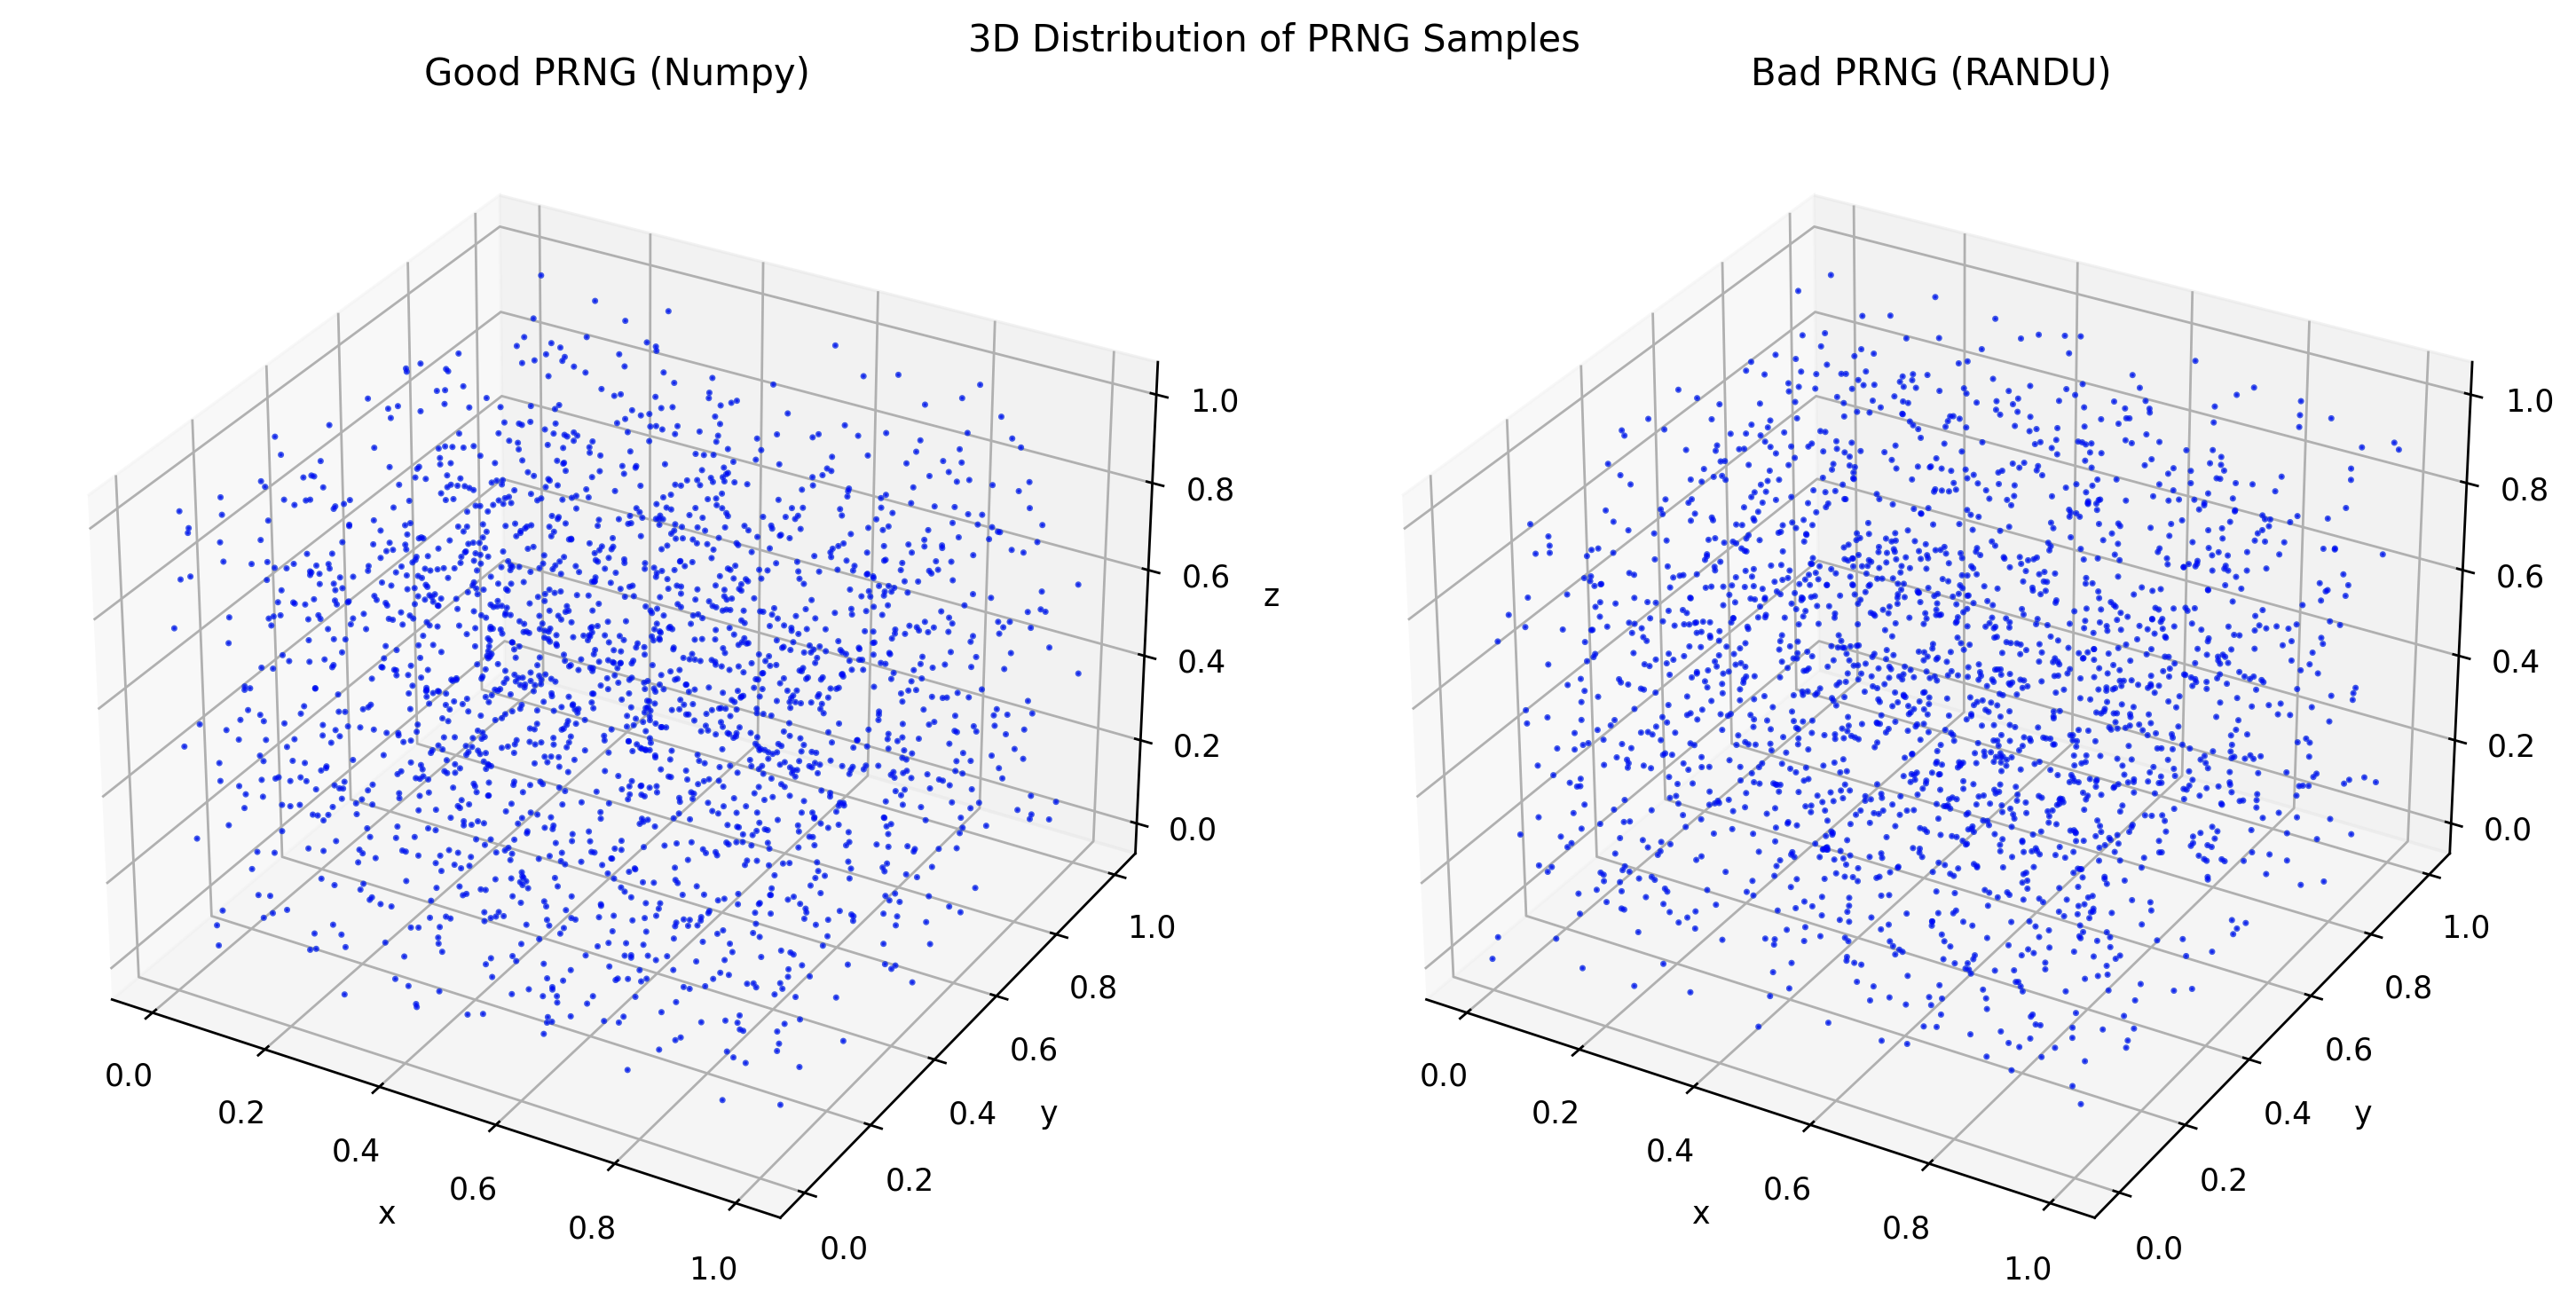

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 250


# --- The "Bad" PRNG (RANDU) ---
class RANDU:
    """
    Represents a simple linear congruential generator with the characteristics of RANDU.

    Attributes:
        seed: Initial value for the generator.
    """

    def __init__(self, seed):
        """
        Initializes the generator with a given seed.

        Args:
            seed (int): The initial seed value for the generator.
        """
        self.n = seed
        self.m = 2**31
        self.a = 65539

    def next(self):
        """
        Generates the next random number in the sequence.

        Returns:
            float: A floating-point number between [0, 1].
        """
        self.n = (self.a * self.n) % self.m
        return self.n / self.m


# --- The Monte Carlo Test ---
def estimate_volume(generator_func, n_samples):
    """
    Estimates the volume of a unit sphere in one octant using a given random number generator function.

    Args:
        generator_func: A callable that returns three sequential random numbers for x, y, z coordinates.
        n_samples (int): The number of samples to generate.

    Returns:
        float: Estimated volume of the unit sphere in one octant.
    """
    in_sphere = 0

    for _ in range(n_samples):
        # Get three sequential random numbers
        x = generator_func()
        y = generator_func()
        z = generator_func()

        if x**2 + y**2 + z**2 <= 1.0:
            in_sphere += 1

    # Volume of octant = (points_in / total_points) * Volume_of_cube (which is 1)
    return in_sphere / n_samples


# --- Running the Simulation ---

n_samples = 500_000
true_volume = (4/3 * np.pi) / 8  # Volume of a sphere in one octant

# 1. Test with the "Good" PRNG (Numpy's Mersenne Twister/PCG)
# We need a function that returns one number at a time
good_gen_func = lambda: np.random.rand()
volume_good = estimate_volume(good_gen_func, n_samples)

# 2. Test with the "Bad" PRNG (RANDU)
randu_gen = RANDU(seed=1)
bad_gen_func = lambda: randu_gen.next()
volume_bad = estimate_volume(bad_gen_func, n_samples)


# --- Print Results ---
print("--- Monte Carlo Volume Estimation ---")
print(f"       True Volume (Octant): {true_volume:.6f}")
print(f"  Good PRNG (Numpy) Volume: {volume_good:.6f}  (Error: {abs(volume_good - true_volume):.6f})")
print(f"   Bad PRNG (RANDU) Volume: {volume_bad:.6f}  (Error: {abs(volume_bad - true_volume):.6f})")


# --- Visual Proof ---
print("\nGenerating 3D plot to show the RANDU failure...")

# 1. Get points from RANDU
randu_gen_plot = RANDU(seed=1)
n_plot = 2000
randu_points = np.array([randu_gen_plot.next() for _ in range(n_plot * 3)]).reshape(-1, 3)

# 2. Get points from Numpy
numpy_points = np.random.rand(n_plot, 3)

# 3. Plotting
fig = plt.figure(figsize=(12, 6))

# Plot Good PRNG
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(numpy_points[:,0], numpy_points[:,1], numpy_points[:,2], s=1, alpha=0.5)
ax1.set_title("Good PRNG (Numpy)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# Plot Bad PRNG
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(randu_points[:,0], randu_points[:,1], randu_points[:,2], s=1, alpha=0.5)
ax2.set_title("Bad PRNG (RANDU)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

# Change the color of the points to blue
ax1.scatter(numpy_points[:,0], numpy_points[:,1], numpy_points[:,2], s=1, alpha=0.5, c='blue')
ax2.scatter(randu_points[:,0], randu_points[:,1], randu_points[:,2], s=1, alpha=0.5, c='blue')

plt.suptitle("3D Distribution of PRNG Samples")
plt.tight_layout()
plt.show()
